# Classifying ALL- the best model nn_pca__3

## Dependencies

In [37]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# To remove these warnings : "Your kernel may have been built without NUMA support."
#   run these 2 lines before importing tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'        # or any {'0', '1', '2', '3'}

import joblib
from tensorflow.keras.models import load_model

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

In [14]:
# Import the script from different folder
import sys  
#  sys.path.append('/content/drive/MyDrive/Omdena/Team1/scripts')
sys.path.append('../scripts')

import metrics_utilities as mu

# Import model build function "get_clf"from the script "keras_model.py"
import keras_model as km

## Batch_4 Train Dataset

In [2]:
# df_train = pd.read_pickle('/content/drive/MyDrive/Omdena/Team1/batch_4/train_data.pickle')
df_train = pd.read_pickle('../data/batch_4/train_data.pickle')
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.185833,0.0,0.00000,0.000000,0.0,0.0,0.0,0.231458,0.0,0.0,...,0.545079,0.170755,0.0,0.096298,0.174819,0.0,0.0,0.361853,0.0,0
1,0.123157,0.0,0.56544,0.350086,0.0,0.0,0.0,0.228849,0.0,0.0,...,0.663390,0.115025,0.0,0.099379,0.516193,0.0,0.0,0.239392,0.0,1
2,0.197977,0.0,0.00000,0.000000,0.0,0.0,0.0,0.155163,0.0,0.0,...,0.663023,0.021846,0.0,0.000000,0.173690,0.0,0.0,0.270634,0.0,1
3,0.580151,0.0,0.00000,0.000000,0.0,0.0,0.0,0.298566,0.0,0.0,...,0.470815,0.000000,0.0,0.000000,0.118325,0.0,0.0,0.000000,0.0,0
4,0.066450,0.0,0.00000,0.000000,0.0,0.0,0.0,0.145156,0.0,0.0,...,0.645798,0.015262,0.0,0.027536,0.275665,0.0,0.0,0.000000,0.0,0


#### Separate features and labels

In [3]:
X_train = df_train.iloc[:, : -1]
y_train = df_train['label']
print(X_train.shape, y_train.shape)

(11917, 4608) (11917,)


## Batch_4 Test Dataset

In [4]:
# df_test = pd.read_pickle('/content/drive/MyDrive/Omdena/Team1/batch_4/test_data.pickle')
df_test = pd.read_pickle('../data/batch_4/test_data.pickle')
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,label
0,0.141500,0.0,0.000000,0.000000,0.0,0.0,0.0,0.151137,0.0,0.0,...,0.885778,0.066009,0.0,0.169458,0.570154,0.0,0.0,0.090579,0.0,0
1,0.047403,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.649062,0.260996,0.0,0.049776,0.494771,0.0,0.0,0.480568,0.0,0
2,0.000000,0.0,0.000000,0.023559,0.0,0.0,0.0,0.060329,0.0,0.0,...,0.725523,0.166289,0.0,0.131945,0.299330,0.0,0.0,0.000000,0.0,0
3,0.002286,0.0,0.655825,0.259398,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.626934,0.244303,0.0,0.100791,0.448022,0.0,0.0,0.295682,0.0,0
4,0.279953,0.0,0.000000,0.000000,0.0,0.0,0.0,0.168589,0.0,0.0,...,0.489483,0.166786,0.0,0.000000,0.212874,0.0,0.0,0.000000,0.0,0


#### Separate features and labels

In [5]:
X_test = df_test.iloc[:, :-1]
y_test = df_test['label']
print(X_test.shape, y_test.shape)

(1794, 4608) (1794,)


#### Names of Classes

In [6]:
target_names = ['hem', 'all']

## Two steps model loading

Prepare paths and pipeline step name

In [12]:
# Prepare paths
cwd = os.getcwd()  # current working folder
pardir = os.path.dirname(cwd)   # parent folder

folder = os.path.join(pardir, 'saved_models')
path_pipe = os.path.join(folder, 'nn_pca_3_pipeline.sav')
path_keras = os.path.join(folder, 'nn_pca_3_keras.h5')
# Pipeline step for classifier
step = 'clf'

#### Step 1 - load the pipeline

In [19]:
# Load the pipeline first
model_l = joblib.load(path_pipe)

#### Step 2 - load the Keras classifier

In [20]:
# Then, load the Keras model
model_l.named_steps[step].model_ = load_model(path_keras)

In [21]:
# Make predictions with the hypertuned model
y_pred = model_l.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy after tuning: {accuracy * 100.0:.2f}')

Accuracy after tuning: 86.90


In [25]:
# Compare training and testing scores
print(f"Training Data Score: {model_l.score(X_train, y_train)}")
print(f"Testing Data Score: {model_l.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.8690078037904125


In [27]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 263   76]
 [ 159 1296]]


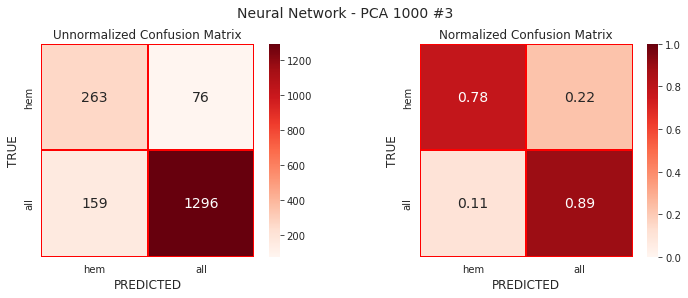

In [28]:
# Plot confusion matrix and its normalized version.
mu.plot_cm_unnorm_and_norm('Neural Network - PCA 1000 #3', y_test, y_pred, target_names, 'Reds')

In [29]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

         hem       0.62      0.78      0.69       339
         all       0.94      0.89      0.92      1455

    accuracy                           0.87      1794
   macro avg       0.78      0.83      0.80      1794
weighted avg       0.88      0.87      0.87      1794



## Plot ROC Curves

In [33]:
# Best performing models dictionary
best_models = {'Neural Network - PCA 1000 #3' : model_l,
}

#### Create function to plot ROC curves for train and test data

In [35]:
def plot_roc_curves(model_name, model, batch, X_train, X_test, y_train, y_test):
    fig, [ax_train, ax_test] = plt.subplots(1, 2, figsize=(11, 5))
    fig.suptitle(f'{model_name}', fontsize=14)
    
    pred_train = model.predict(X_train)
    pred_test= model.predict(X_test)
    auc_train = roc_auc_score(y_train, pred_train)
    auc_test = roc_auc_score(y_test, pred_test)
    fpr_train, tpr_train, _ = roc_curve(y_train, pred_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, pred_test)

    ax_train.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
    ax_test.plot([0, 1], [0, 1], 'r--', label='Random Guessing')

    ax_train.plot(fpr_train, tpr_train, label=f'{model_name} (AUC: {auc_train:.2f})')
    ax_test.plot(fpr_test, tpr_test, label=f'{model_name} (AUC: {auc_test:.4f})')

    ax_train.set_title(f'ROC curve - Train Data - {batch}')
    ax_test.set_title(f'ROC curve - Test Data- {batch}')
                    
    ax_train.set_xlabel('False positive rate')
    ax_test.set_xlabel('False positive rate')

    ax_train.set_ylabel('True positive rate')
    ax_test.set_ylabel('True positive rate')

    ax_train.legend(loc='best')
    ax_test.legend(loc='best')

    plt.show()
    print()

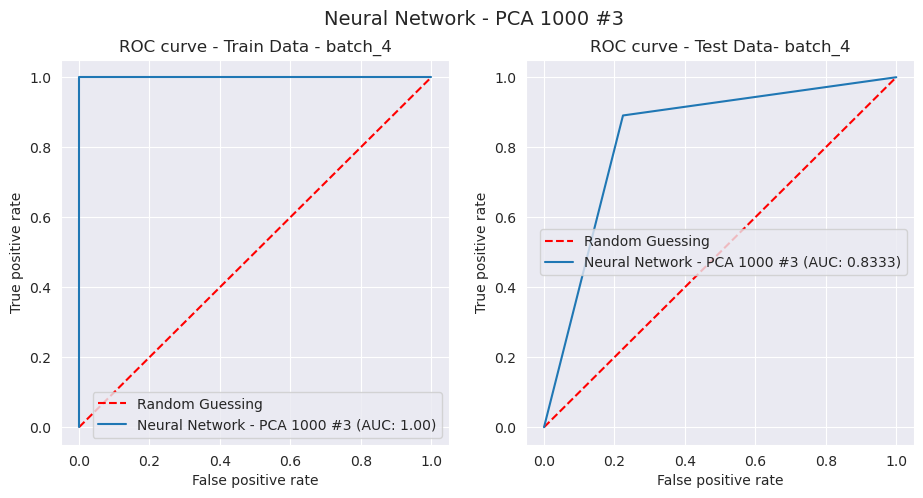

In [38]:
# Plot ROC curves for each of best performing models
for mn, m in best_models.items():
    plot_roc_curves(mn, m, 'batch_4', X_train, X_test, y_train, y_test)